Warning message:
"package 'readr' was built under R version 4.0.3"
Warning message:
"package 'bsts' was built under R version 4.0.3"
Loading required package: BoomSpikeSlab

Warning message:
"package 'BoomSpikeSlab' was built under R version 4.0.3"
Loading required package: Boom

Warning message:
"package 'Boom' was built under R version 4.0.3"
Loading required package: MASS


Attaching package: 'Boom'


The following object is masked from 'package:stats':

    rWishart



Attaching package: 'BoomSpikeSlab'


The following object is masked from 'package:stats':

    knots


Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: xts


Attaching package: 'bsts'


The following object is masked from 'package:BoomSpikeSlab':

    SuggestBurn



-- Column specification -------------------------------------------------------------------------------------------------------------

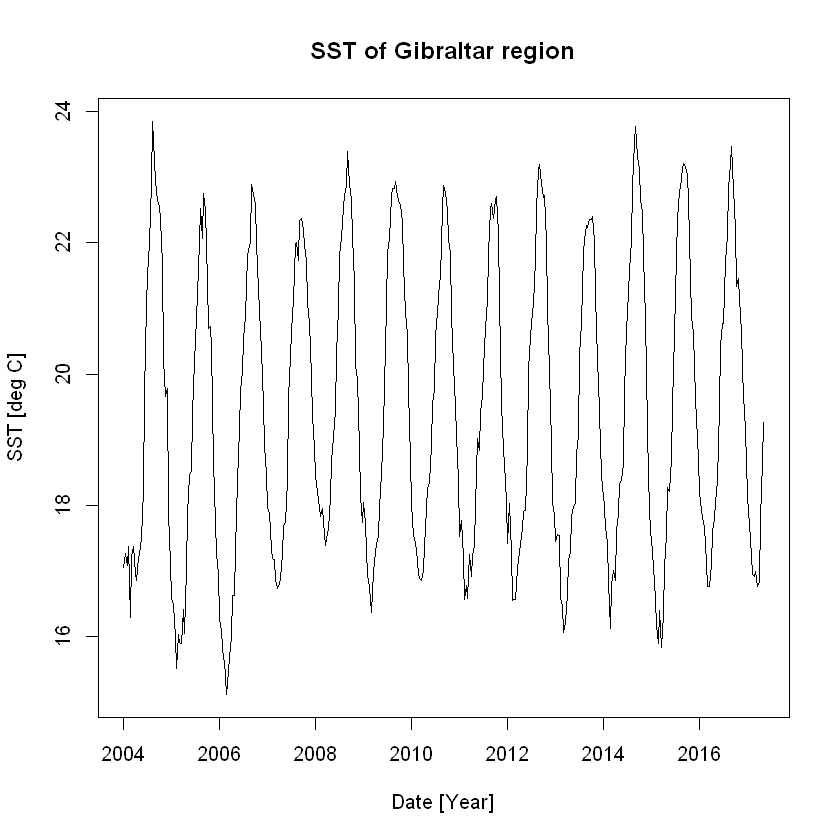

In [2]:
library(readr)
library(bsts)
gibralter <- read_csv("data/gilbraltersimple.csv")
gilt <- ts(gibralter$tempMean, start=c(2004,1,13), 
           end=c(2017,11,25), frequency=30)
plot(gilt, main='SST of Gibraltar region',
    xlab="Date [Year]", ylab="SST [deg C]")

In [3]:
ll_ss <- list()
ll_ss <- AddLocalLevel(state.specification = ll_ss, y = gilt)
ll_fit <- bsts(gilt, state.specification = ll_ss, niter = 1e3)
# MCMC iterations = 1000

=-=-=-=-= Iteration 0 Thu Feb 25 08:54:15 2021
 =-=-=-=-=
=-=-=-=-= Iteration 100 Thu Feb 25 08:54:15 2021
 =-=-=-=-=
=-=-=-=-= Iteration 200 Thu Feb 25 08:54:16 2021
 =-=-=-=-=
=-=-=-=-= Iteration 300 Thu Feb 25 08:54:16 2021
 =-=-=-=-=
=-=-=-=-= Iteration 400 Thu Feb 25 08:54:16 2021
 =-=-=-=-=
=-=-=-=-= Iteration 500 Thu Feb 25 08:54:17 2021
 =-=-=-=-=
=-=-=-=-= Iteration 600 Thu Feb 25 08:54:17 2021
 =-=-=-=-=
=-=-=-=-= Iteration 700 Thu Feb 25 08:54:18 2021
 =-=-=-=-=
=-=-=-=-= Iteration 800 Thu Feb 25 08:54:18 2021
 =-=-=-=-=
=-=-=-=-= Iteration 900 Thu Feb 25 08:54:18 2021
 =-=-=-=-=


# Local Linear Trend Model

$$
y_{t} = \mu_{t} + \varepsilon_{t}, \quad \varepsilon_{t} \sim \mathcal{N}(0, \sigma_{\varepsilon}^2)
$$
$$
\mu_{t+1} = \mu_{t} + \nu_{t} + \xi_{t}, \quad \xi_{t} \sim \mathcal{N}(0, \sigma_{\xi}^2) 
$$
$$
\nu_{t+1} = \nu_{t} + \zeta_{t}, \quad \zeta_{t} \sim \mathcal{N}(0, \sigma_{\zeta})
$$

In [4]:
llt_ss <- list()
llt_ss <- AddLocalLinearTrend(state.specification = llt_ss, 
                             y = gilt)
llt_fit <- bsts(gilt, state.specification = llt_ss, 
               niter = 1e3)

=-=-=-=-= Iteration 0 Thu Feb 25 08:54:19 2021
 =-=-=-=-=
=-=-=-=-= Iteration 100 Thu Feb 25 08:54:19 2021
 =-=-=-=-=
=-=-=-=-= Iteration 200 Thu Feb 25 08:54:20 2021
 =-=-=-=-=
=-=-=-=-= Iteration 300 Thu Feb 25 08:54:20 2021
 =-=-=-=-=
=-=-=-=-= Iteration 400 Thu Feb 25 08:54:21 2021
 =-=-=-=-=
=-=-=-=-= Iteration 500 Thu Feb 25 08:54:21 2021
 =-=-=-=-=
=-=-=-=-= Iteration 600 Thu Feb 25 08:54:22 2021
 =-=-=-=-=
=-=-=-=-= Iteration 700 Thu Feb 25 08:54:22 2021
 =-=-=-=-=
=-=-=-=-= Iteration 800 Thu Feb 25 08:54:23 2021
 =-=-=-=-=
=-=-=-=-= Iteration 900 Thu Feb 25 08:54:23 2021
 =-=-=-=-=


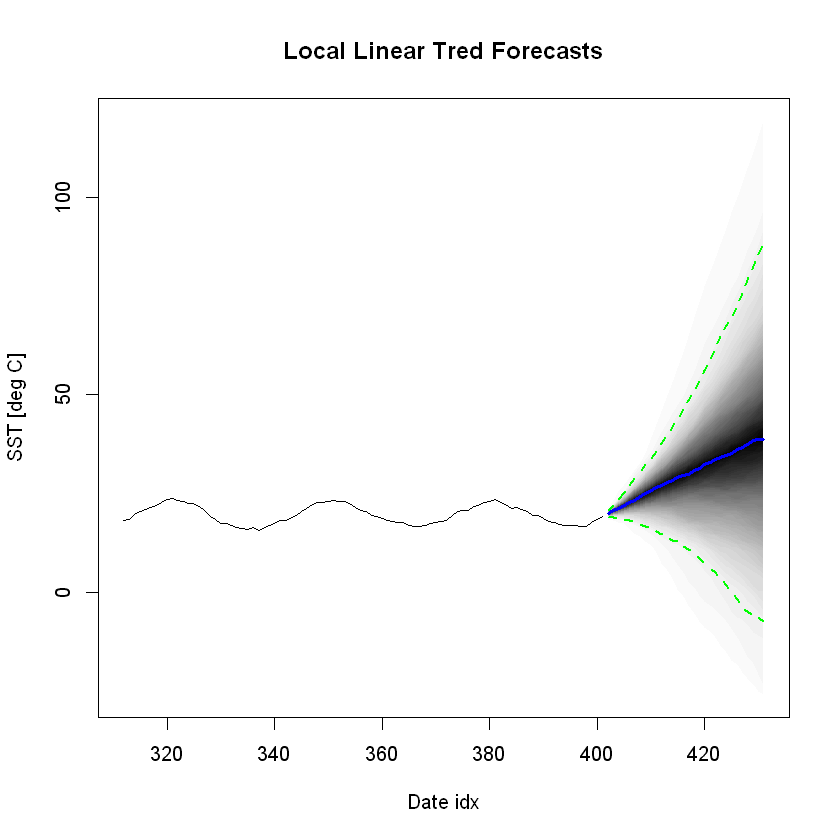

In [5]:
llt_pred <- predict(llt_fit, horizon = 30)
plot(llt_pred, plot.original = 90,
    main = 'Local Linear Tred Forecasts',
    xlab = 'Date idx', ylab = 'SST [deg C]')

# Local Trend with Seasonality

$$
y_{t} = \mu_{t} + \tau_{t} + \varepsilon_{t}\quad \varepsilon_{t} \sim \mathcal{N}(0, \sigma_{t}^2)
$$
$$
\tau_{t} = - \sum_{s=1}^{S-1}\tau_{t-s} + \omega_{t} \quad \omega_{t} \sim \mathcal{N}(0, \sigma_{\omega}^2)
$$

In [6]:
lts_ss <- list()
lts_ss <- AddLocalLinearTrend(lts_ss, y = gilt)
lts_ss <- AddSeasonal(lts_ss, gilt, nseasons = 30)
lts_fit <- bsts(gilt, state.specification = lts_ss,
               niter = 1e3)

=-=-=-=-= Iteration 0 Thu Feb 25 08:54:24 2021
 =-=-=-=-=
=-=-=-=-= Iteration 100 Thu Feb 25 08:54:26 2021
 =-=-=-=-=
=-=-=-=-= Iteration 200 Thu Feb 25 08:54:28 2021
 =-=-=-=-=
=-=-=-=-= Iteration 300 Thu Feb 25 08:54:30 2021
 =-=-=-=-=
=-=-=-=-= Iteration 400 Thu Feb 25 08:54:32 2021
 =-=-=-=-=
=-=-=-=-= Iteration 500 Thu Feb 25 08:54:34 2021
 =-=-=-=-=
=-=-=-=-= Iteration 600 Thu Feb 25 08:54:36 2021
 =-=-=-=-=
=-=-=-=-= Iteration 700 Thu Feb 25 08:54:38 2021
 =-=-=-=-=
=-=-=-=-= Iteration 800 Thu Feb 25 08:54:40 2021
 =-=-=-=-=
=-=-=-=-= Iteration 900 Thu Feb 25 08:54:42 2021
 =-=-=-=-=


In [7]:
plot(lts_fit)

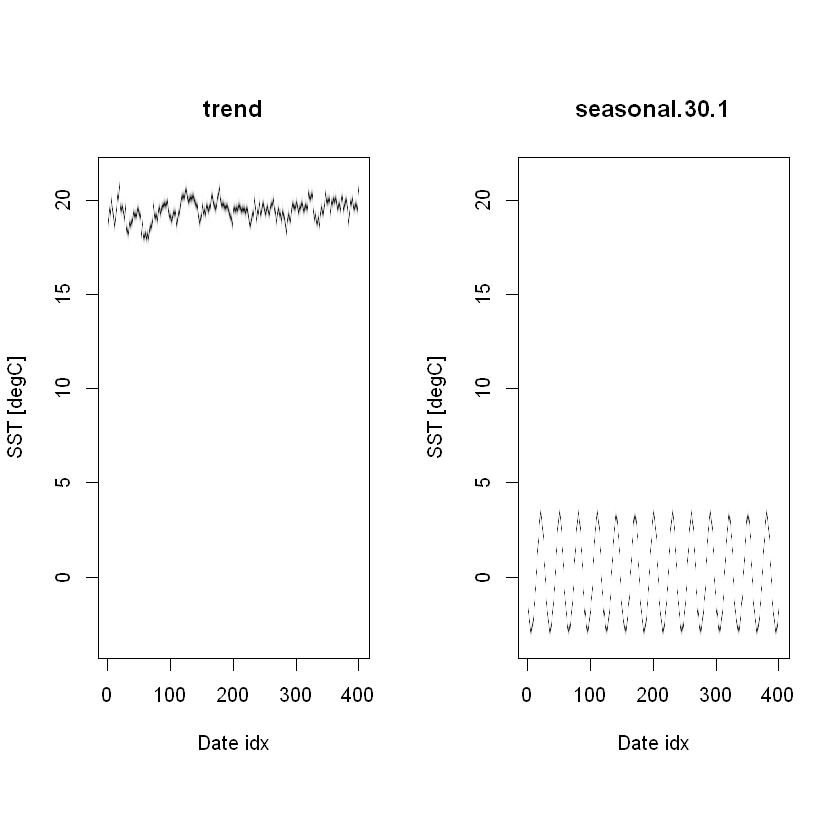

In [8]:
# Posterior state components
plot(lts_fit, 'components',
    xlab = 'Date idx', ylab='SST [degC]')

In [9]:
# Forecasts
lts_pred <- predict(lts_fit, horizon=30)
plot(lts_pred, plot.original = 90, 
    main = 'Seasonal local linear trend forecasts',
    xlab = 'Date idx', ylab = 'SST [deg C]')

In [10]:
CompareBstsModels(lwd = 4, model.list = list(
level = ll_fit, trend = llt_fit, season = lts_fit),
                 colors = c("forestgreen", "firebrick", "blue4"),
                 xlab = " Date idx")